# Projet 5 - Optimisez la gestion des données d'une boutique

## Plan

* [1 - Importation des librairies](#chapter1)
   
* [2 - Lecture des données et vérification du typage des colonnes](#chapter2)
    
    * [2.1 - Données de correspondance des produits ERP et Web](#section_2_1)
    * [2.2 - Données erp](#section_2_2)
    * [2.3 - Données Web](#section_2_3)

* [3 - Qualité des données](#chapter3)
    
    * [3.1 - Données de correspondance des produits ERP et Web](#section_3_1)
    * [3.2 - Données erp ](#section_3_2)
    * [3.3 - Données web](#section_3_3)

* [4 - Analyses des données](#chapter4)
    
    * [4.1 - Rapprochement des exports Erp et web ](#section_4_1)
    * [4.2 - Calcul du chiffre d affaire par produit](#section_4_2)
    * [4.3 - Calcul du chiffre d affaire total réalisé en ligne](#section_4_3)
    * [4.4 - Étude de la répartition du nombre de bouteilles vendu par catégorie de prix (analyse univariée) ](#section_4_4)
    * [4.5 - Liste et nombre des outliers ](#section_4_5)
    * [4.6 - Représentation graphique des outliers  ](#section_4_6)
    
* [5 - Interprétations et préconisations](#chapter5)

## 1 - Importation des librairies <a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2 - Lecture des données et vérification du typage des colonnes <a class="anchor" id="chapter2"></a>

### 2.1 - Données de correspondance des produits ERP et Web <a class="anchor" id="section_2_1"></a>

##### Importer les données du fichier liaison.csv dans le dataframe dataliaison

In [2]:
dataliaison=pd.read_csv('C:/Users/33768/Documents/DataSets/Projet 5/liaison.csv', sep=',',encoding='UTF-8')  


##### Afficher les 5 premières lignes pour s assurer que les données ont été chargées correctement

In [3]:
print(dataliaison.head()) 

   product_id id_web
0        3847  15298
1        3849  15296
2        3850  15300
3        4032  19814
4        4039  19815


##### Afficher la dimension du dataframe

In [4]:
print(dataliaison.shape)  

(825, 2)


##### Afficher le type des données

In [5]:
print(dataliaison.dtypes)    

product_id     int64
id_web        object
dtype: object


 ### 2.2 - Données erp <a class="anchor" id="section_2_2"></a>

##### Importer les données du fichier erp.csv dans le dataframe dataErp

In [6]:
dataErp=pd.read_csv('C:/Users/33768/Documents/DataSets/Projet 5/erp.csv', sep=',',encoding='UTF-8')

##### Afficher les 5 premières lignes pour s assurer que les données ont été chargées correctement

In [7]:
print(dataErp.head())

   product_id  onsale_web price  stock_quantity stock_status
0        3847           1  24,2               0   outofstock
1        3849           1  34,3               0   outofstock
2        3850           1  20,8               0   outofstock
3        4032           1  14,1               0   outofstock
4        4039           1    46               0   outofstock


#### Afficher la dimension du dataframe

In [8]:
print(dataErp.shape)  

(825, 5)


##### Afficher le type des données

In [9]:
print(dataErp.dtypes)

product_id         int64
onsale_web         int64
price             object
stock_quantity     int64
stock_status      object
dtype: object


### 2.3 - Données Web <a class="anchor" id="section_2_3"></a>

##### Importer les données du fichier web.csv dans le dataframe dataWeb

In [10]:
dataWeb=pd.read_csv('C:/Users/33768/Documents/DataSets/Projet 5/web.csv', sep=',',encoding='UTF-8') 

##### Afficher les 5 premières lignes pour s assurer que les données ont été chargées correctement

In [11]:
print(dataWeb.head())

                   sku  virtual  downloadable  rating_count  average_rating  \
0  bon-cadeau-25-euros        0             0             0             0.0   
1                15298        0             0             0             0.0   
2                15296        0             0             0             0.0   
3                15300        0             0             0             0.0   
4                19814        0             0             0             0.0   

   total_sales tax_status  tax_class  post_author            post_date  ...  \
0         10.0    taxable        NaN          1.0  2018-06-01 13:53:46  ...   
1          6.0    taxable        NaN          2.0  2018-02-08 12:58:52  ...   
2          0.0    taxable        NaN          2.0  2018-02-08 13:49:41  ...   
3          0.0    taxable        NaN          2.0  2018-02-08 14:08:36  ...   
4          3.0    taxable        NaN          2.0  2018-02-09 14:01:05  ...   

                                           post_na

#### Afficher la dimension du dataframe

In [12]:
print(dataWeb.shape)

(1513, 28)


##### Afficher le type des données

In [13]:
print(dataWeb.dtypes) 

sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                 object
post_mime_type            object
comment_count            float64
dtype: object


## 3 - Qualité des données <a class="anchor" id="chapter3"></a>

### 3.1 - Données de correspondance des produits ERP et Web <a class="anchor" id="section_3_1"></a>

##### Vérifier qu'il n y a pas d entrée manquante (NaN)
 

In [14]:
dataliaison.isna().sum()

product_id     0
id_web        91
dtype: int64

##### Vérifier la présence des doublons dans le dataframe dataliaison

In [15]:
print(dataliaison.duplicated().sum())

0


##### Renommer l'id_web en sku pour corriger l erreur de Sylvie

In [16]:
dataliaison.rename(columns={'id_web':'sku'}, inplace=True)

##### Afficher le dataframe pour s'assurer que le renommage de la colonne a été pris en compte

In [17]:
dataliaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


### 3.2 - Données erp <a class="anchor" id="section_3_2"></a>

##### Vérifier qu'il n y a pas d entrée manquante (NaN)

In [18]:
print(dataErp.isna().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


##### Vérifier la présence des doublons et l'unicité de la clé primaire

In [19]:
print(dataErp.duplicated(subset=['product_id']).sum())

0


##### Vérifier que tous les id des produits présents dans l'erp sont présents dans le fichier de liaison

In [20]:
print(dataErp.product_id.isin(dataliaison.product_id).all())

True


##### Convertir les données de la colonne price (objects) en string

In [21]:
dataErp["price"] = dataErp["price"] . str . replace ( ',' ,  '.' ) 

##### Convertir les données de la colonne price (string) en float

In [22]:
dataErp["price"]=dataErp["price"].astype(float) 

##### Afficher le type des données après conversion

In [23]:
print(dataErp.dtypes)

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object


### 3.3 - Données web <a class="anchor" id="section_3_3"></a>

##### Vérifier la présence d entrée manquante (NaN)

In [24]:
dataWeb.isna().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

##### Vérifier la présence des doublons et l'unicité de la clé primaire

In [25]:
dataWeb.duplicated(subset=['sku']).sum()

798

##### Suppression des doublons du data frame dataWeb. Ligne avec post_type=attachment

In [26]:
dataWeb=dataWeb.drop_duplicates('sku',keep = 'first') 

##### Afficher la dimension du dataframe afin de connaitre le nombre de ligne restant après la suppression des doublons

In [27]:
print(dataWeb.shape)

(715, 28)


##### Vérifier la présence d'entrées manquantes (NaN)

In [28]:
dataWeb.isna().sum()

sku                        1
virtual                    0
downloadable               0
rating_count               0
average_rating             1
total_sales                1
tax_status                 1
tax_class                715
post_author                1
post_date                  1
post_date_gmt              1
post_content             715
post_title                 1
post_excerpt               1
post_status                1
comment_status             1
ping_status                1
post_password            715
post_name                  1
post_modified              1
post_modified_gmt          1
post_content_filtered    715
post_parent                1
guid                       1
menu_order                 1
post_type                  1
post_mime_type           715
comment_count              1
dtype: int64

##### Suppression de la ligne de données avec le SKU NaN

In [29]:
dataWeb=dataWeb.dropna(subset=['sku']) 

##### Afficher la dimension du dataframe afin de connaitre le nombre de ligne restant après la suppression de la ligne avec sku NaN

In [30]:
print(dataWeb.shape)

(714, 28)


##### Vérifier que tous les id des produits vendus sur le web sont présents dans le fichier de liaison

In [31]:
dataWeb.sku.isin(dataliaison.sku).all()

True

##### Remplacer les valeurs NaN de la colonne total_sales par 0

In [32]:
dataWeb['total_sales'].fillna(0, inplace=True)

##### Remplacer les valeurs NaN de la colonne average_rating par 0

In [33]:
dataWeb['average_rating'].fillna(0, inplace=True)

##### Vérifier qu'il n'existe plus de valeurs NaN sur les colonnes traitées

In [34]:
dataWeb.isna().sum()

sku                        0
virtual                    0
downloadable               0
rating_count               0
average_rating             0
total_sales                0
tax_status                 0
tax_class                714
post_author                0
post_date                  0
post_date_gmt              0
post_content             714
post_title                 0
post_excerpt               0
post_status                0
comment_status             0
ping_status                0
post_password            714
post_name                  0
post_modified              0
post_modified_gmt          0
post_content_filtered    714
post_parent                0
guid                       0
menu_order                 0
post_type                  0
post_mime_type           714
comment_count              0
dtype: int64

## 4 - Analyses des données <a class="anchor" id="chapter4"></a>

### 4.1 - Rapprochement des exports Erp et web <a class="anchor" id="section_4_1"></a>

##### Jointure des données Erp et liaison

In [35]:
dataErpLiaison = pd.merge(dataErp, dataliaison, on=['product_id','product_id']) 

##### Jointure des données ERP, liaison et web

In [36]:
dataErpLiaisonWeb = pd.merge(dataErpLiaison, dataWeb, on=['sku','sku'])

##### Afficher les données après le rapprochement des exports erp et web

In [37]:
dataErpLiaisonWeb[['product_id','sku','onsale_web','price','stock_quantity','total_sales']]   

,product_id,sku,onsale_web,price,stock_quantity,total_sales
0,3847,15298,1,24.2,0,6.0
1,3849,15296,1,34.3,0,0.0
2,3850,15300,1,20.8,0,0.0
3,4032,19814,1,14.1,0,3.0
4,4039,19815,1,46.0,0,0.0
...,...,...,...,...,...,...
709,6930,16135,1,8.4,83,5.0
710,7023,15891,1,27.5,15,0.0
711,7025,15887,1,69.0,2,0.0
712,7247,13127-1,1,54.8,23,0.0


##### Interprétations

In [38]:
print('Après le rapprochement, nous avons 714 produits à analyser.')

Après le rapprochement, nous avons 714 produits à analyser.


### 4.2 - Calcul du chiffre d'affaire par produit <a class="anchor" id="section_4_2"></a>

##### Calculer le CA par produit

In [39]:
dataErpLiaisonWeb['CA Produit']=dataErpLiaisonWeb['price']*dataErpLiaisonWeb['total_sales']

##### Afficher le CA par produit

In [40]:
dataErpLiaisonWeb[['product_id','sku','price','stock_quantity','total_sales','CA Produit']]

,product_id,sku,price,stock_quantity,total_sales,CA Produit
0,3847,15298,24.2,0,6.0,145.2
1,3849,15296,34.3,0,0.0,0.0
2,3850,15300,20.8,0,0.0,0.0
3,4032,19814,14.1,0,3.0,42.3
4,4039,19815,46.0,0,0.0,0.0
...,...,...,...,...,...,...
709,6930,16135,8.4,83,5.0,42.0
710,7023,15891,27.5,15,0.0,0.0
711,7025,15887,69.0,2,0.0,0.0
712,7247,13127-1,54.8,23,0.0,0.0


##### Interprétations

In [41]:
print('Tous les produits ne génèrent pas de chiffre d\'affaire.')

Tous les produits ne génèrent pas de chiffre d'affaire.


### 4.3 - Calcul du chiffre d'affaire total réalisé en ligne <a class="anchor" id="section_4_3"></a>

##### Calculer le CA total

In [42]:
CATotal=dataErpLiaisonWeb['CA Produit'].sum() 

##### Afficher le CA total

In [43]:
print('Le CA Total est de '+ str(CATotal))

Le CA Total est de 70568.6


### 4.4 - Étude de la répartition du nombre de bouteilles vendu par catégorie de prix (analyse univariée) <a class="anchor" id="section_4_4"></a>

##### Création d'un histogramme

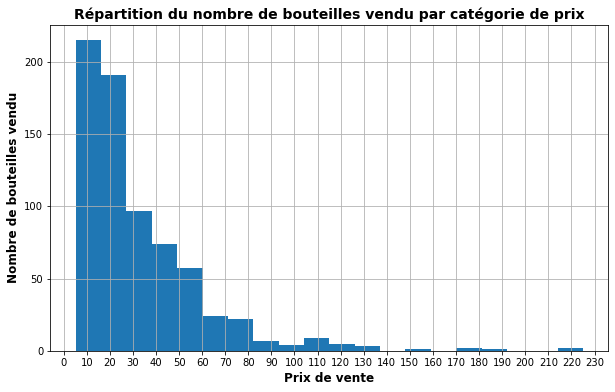

In [44]:
plt.figure(figsize=(10,6))
dataErpLiaisonWeb['price'].hist(density=False, bins=20)
plt.xticks([10*i for i in range(24)])
plt.ylabel('Nombre de bouteilles vendu', fontsize=12, fontweight='bold')
plt.xlabel('Prix de vente', fontsize=12, fontweight='bold')
plt.title('Répartition du nombre de bouteilles vendu par catégorie de prix', fontsize=14, fontweight='bold')
plt.show()

##### Interprétations

In [45]:
print('Quand le prix augmente, le nombre de vente diminue. A partir d\'un prix de 84, les ventes subissent une baisse accrue. Les prix réalisant le plus de vente sont compris entre 5,20 à 10,5.')

Quand le prix augmente, le nombre de vente diminue. A partir d'un prix de 84, les ventes subissent une baisse accrue. Les prix réalisant le plus de vente sont compris entre 5,20 à 10,5.


In [46]:
### 4.5 - Analyse de la variable prix afin de détecter d’éventuels outliers

##### Calculer le premier quartile

In [47]:
Q1=dataErpLiaisonWeb['price'].quantile(0.25)

##### Afficher le premier quartile

In [48]:
print('Premier quartile : ' + ' '+ str(Q1))

Premier quartile :  14.1


##### Calculer le troisième quartile

In [49]:
Q3=dataErpLiaisonWeb['price'].quantile(0.75)

##### Afficher le troisième quartile

In [50]:
print('Troisième quartile : ' + ' '+ str(Q3))

Troisième quartile :  42.175000000000004


##### Calculer l ecart inter quartile

In [51]:
IQ=42.17-14.10  

##### Afficher l ecart inter quartile

In [52]:
print('Ecart inter quartile : ' + ' '+ str(IQ))

Ecart inter quartile :  28.07


##### calculer la valeur au delà duquel le prix de vente est un outlier

In [53]:
maxStat=42.17+(IQ*1.5)  

##### Afficher la valeur au delà duquel le prix de vente est un outlier

In [54]:
print('La valeur au delà de laquelle le prix de vente est un outlier : ' + str(maxStat))

La valeur au delà de laquelle le prix de vente est un outlier : 84.275


### 4.5 - Liste et nombre des outliers <a class="anchor" id="section_4_5"></a>

##### Stockage des outliers dans une table

In [55]:
outliersTable = dataErpLiaisonWeb[dataErpLiaisonWeb.price > maxStat]

##### Afficher les outliers

In [56]:
outliersTable[['product_id','price','stock_quantity','stock_status','total_sales','sku','post_title','CA Produit']]

,product_id,price,stock_quantity,stock_status,total_sales,sku,post_title,CA Produit
63,4115,100.0,11,instock,0.0,15382,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,0.0
65,4132,88.4,5,instock,0.0,11668,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,0.0
199,4352,225.0,0,outofstock,5.0,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1125.0
201,4355,126.5,2,instock,11.0,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1391.5
205,4359,85.6,0,outofstock,1.0,13853,Champagne Larmandier-Bernier Grand Cru Les Che...,85.6
218,4402,176.0,8,instock,13.0,3510,Cognac Frapin VIP XO,2288.0
219,4404,108.5,2,instock,2.0,3507,Cognac Frapin Château de Fontpinot XO,217.0
221,4406,157.0,3,instock,0.0,7819,Cognac Frapin Château de Fontpinot 1989 20 Ans...,0.0
222,4407,104.0,6,instock,1.0,3509,Cognac Frapin Cigar Blend,104.0
227,4582,109.6,7,instock,0.0,12857,Château de Meursault Puligny-Montrachet 1er Cr...,0.0


##### Compter le nombre d outliers

In [57]:
nbreOutliers=outliersTable['product_id'].count()
print('Nombre d\'outliers :' + ' ' + str(nbreOutliers))

Nombre d'outliers : 32


##### Le chiffre d'affaire generé par les outliers

In [58]:
print('Le chiffre d\'affaire generé par les outliers est de ' + ' '+ str(outliersTable['CA Produit'].sum()))

Le chiffre d'affaire generé par les outliers est de  6970.0


##### Pourcentage du CA des outliers sur le CA total

In [59]:
print('Le pourcentage du chiffre d\'affaire des outliers sur le chiffre d\'affaire global est de' + ' '+ str((outliersTable['CA Produit'].sum()*100)/CATotal))

Le pourcentage du chiffre d'affaire des outliers sur le chiffre d'affaire global est de 9.876914094937408


##### Interprétations

In [60]:
print('Il n\'y a pas d\'outliers impertinents car ils génèrent un CA de 6 970 non négligeable, soit 9,88% du chiffre d\'affaire global. Certains produits outliers ne génèrent pas de chiffre d\'affaire tout comme certains produits non qualifiés de outliers. Nous devons donc conserver ces outliers pour notre analyse.')

Il n'y a pas d'outliers impertinents car ils génèrent un CA de 6 970 non négligeable, soit 9,88% du chiffre d'affaire global. Certains produits outliers ne génèrent pas de chiffre d'affaire tout comme certains produits non qualifiés de outliers. Nous devons donc conserver ces outliers pour notre analyse.


### 4.6 - Représentation graphique des outliers <a class="anchor" id="section_4_6"></a>

##### Créer le graphique boite à moustache vertical

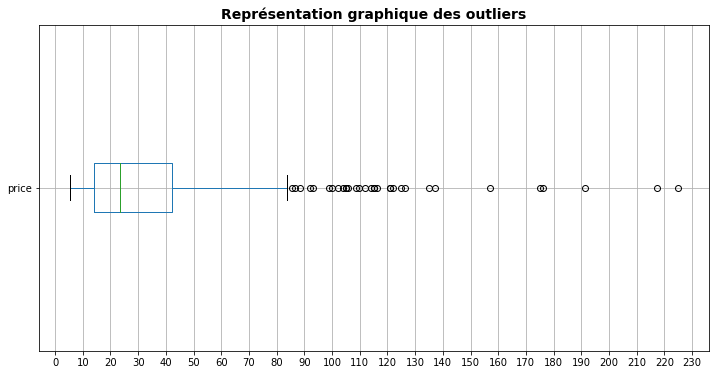

In [61]:
plt.figure(figsize=(12,6))
dataErpLiaisonWeb.boxplot(column="price", vert=False)
plt.xticks([10*i for i in range(24)])

#Ajouter le titre à la boite à moustache
plt.title('Représentation graphique des outliers', fontsize=14, fontweight='bold')

#Afficher le graphique 
plt.show()

##### Interprétations

In [62]:
print('Le prix de vente à partir duquel les valeurs semblent atypiques est 84,275. ')

Le prix de vente à partir duquel les valeurs semblent atypiques est 84,275. 


## 5 - Interprétations et préconisations <a class="anchor" id="chapter5"></a>

In [63]:
print('Nous observons la diminution du nombre de vente au fur et à mesure que le prix de vente augmente. Tous les produits vendus ne génèrent pas du chiffre d\'affaire. Les invendus sont observés pour toutes les tranches de prix (elevé, bas). A partir d\'un prix de 84,2, les ventes subissent une baisse accrue. Nous recensons 32 outliers correspondants à des valeurs atypiques (prix au delà de 84,275). Certains de ces produits génèrent un Chiffre d\'affaire de 6 970, soit 9,88 % du un Chiffre d\'affaire global. Eu égard au fait que nous avons des invendus pour des outliers et non outliers, nous gardons les outliers pour notre analyse. Nous proposons de revoir l\'offre des produits (outliers et non outliers) et commercialiser uniquement des produits qui ont gneré du Chiffre d\'affaire et des nouveautés.')

Nous observons la diminution du nombre de vente au fur et à mesure que le prix de vente augmente. Tous les produits vendus ne génèrent pas du chiffre d'affaire. Les invendus sont observés pour toutes les tranches de prix (elevé, bas). A partir d'un prix de 84,2, les ventes subissent une baisse accrue. Nous recensons 32 outliers correspondants à des valeurs atypiques (prix au delà de 84,275). Certains de ces produits génèrent un Chiffre d'affaire de 6 970, soit 9,88 % du un Chiffre d'affaire global. Eu égard au fait que nous avons des invendus pour des outliers et non outliers, nous gardons les outliers pour notre analyse. Nous proposons de revoir l'offre des produits (outliers et non outliers) et commercialiser uniquement des produits qui ont gneré du Chiffre d'affaire et des nouveautés.
